In [42]:
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Arial"
# matplotlib.rcParams['figure.dpi'] = 80
matplotlib.rcParams['figure.figsize'] = [17, 6]
matplotlib.rcParams['axes.grid'] = True

In [66]:
%load_ext autoreload
%autoreload 2

import sys
sys.version_info

import sys
sys.path.insert(0, '../')


import numpy as np
import matplotlib.pyplot as plt

from lib_data import *

# import tensorflow as tf
# import tensorflow.compat.v1 as tf1
# tf1.disable_eager_execution()

# import nb_func2 as f
import random

# f.DIR = 'models.save3/'
# f.FILE_MODEL = 'model.ckpt-270090'
from tqdm.notebook import tqdm
from lib_lsh import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
load_workspace(vars(), filename='25shot_may18')

Loaded: mem_vals, mem_keys, x, y, x_new, y_new, qs, qs_new, 


In [65]:
hash_planes = np.random.randn(128, 64) 

In [46]:
hash_key = [get_lsh(k) for k in mem_keys]

c:\users\localuser\.venvs\py37\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
c:\users\localuser\.venvs\py37\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in greater


In [47]:
y_true = []
y_preds= []

for i, (qq, yy) in enumerate(zip(qs_new, y_new)): 
#     if i< episode_width * n_shot:
#         continue
        
#     v_query = f.sess.run(query, feed_dict={x_ph: xx, y_ph:yy})
#     normalized_query = qq / np.linalg.norm(qq, axis=1)

    q_hash = get_lsh(qq).reshape(-1)
    
    distance  = hamming(q_hash, hash_key)
    y_pred = mem_vals[distance.argmin()]
    
#     similarities = normalized_query @ mem_keys.T
#     y_pred = mem_vals[similarities.argmax()]
    
    y_preds.append(y_pred)
    y_true.append(yy[0])
    
y_true = np.array(y_true)
y_preds= np.array(y_preds)

print(np.mean(y_true==y_preds))

0.95


In [48]:
from dpe import DPE

dpe = DPE('COM9')
dpe.set_clock(50)

DAC initialized to a span from -10 V to 10 V
Setting vrefs to default
Setting ADC_CK freq=50000.0kHz
Setting CK_ARRAY freq=50000.0kHz


....

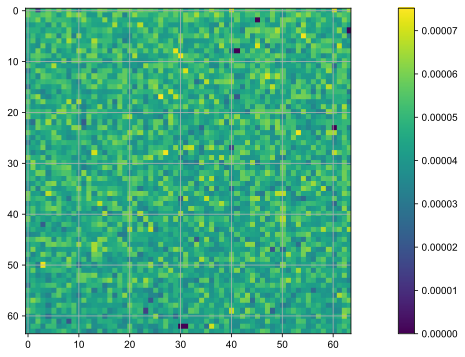

In [49]:
g = dpe.read(0, method='slow')
plt.imshow(g)
plt.colorbar()

In [50]:
vec = np.random.rand(64, 1) - 0.5

vec = np.reshape(vec, -1)
vec = vec / np.linalg.norm(vec)

vec_pos = vec.copy()
vec_pos[vec_pos<0] = 0


vec_neg = vec.copy()
vec_neg[vec_neg>0] = 0

scaling = max( vec_pos.max(), -vec_neg.min())

vec_neg = -vec_neg/scaling
vec_pos =  vec_pos/scaling


Ipos = vec_pos @ g
Ineg = vec_neg @ g

Ires = Ipos - Ineg

print(Ires)

(Ires[::2] > Ires[1::2]).astype(int)

[-1.70323702e-04 -1.63542203e-04 -1.07356233e-04 -1.56239658e-04
 -1.46950366e-04 -9.42543568e-05 -2.07419667e-04 -1.39849147e-04
 -1.05442678e-04 -1.73566389e-04 -1.22723782e-04 -1.14274152e-04
 -1.43364394e-04 -1.96775675e-04 -1.29107061e-04 -1.49147550e-04
 -1.53927311e-04 -6.80146054e-05 -1.76327234e-04 -1.51159424e-04
 -1.30286048e-04 -1.20506208e-04 -1.01748575e-04 -9.07472127e-05
 -1.48351540e-04 -8.59735324e-05 -1.54854803e-04 -1.03989681e-04
 -1.82388236e-04 -1.67247793e-04 -1.94613827e-04 -2.21310701e-04
 -1.35274521e-04 -1.64377215e-04 -2.16847687e-04 -1.28941472e-04
 -9.95982522e-05 -1.42558714e-04 -1.49674219e-04 -8.21939646e-05
 -2.02557206e-04 -1.16594127e-04 -1.27053584e-04 -1.62794442e-04
 -2.41046401e-04 -1.32177986e-04 -1.42661770e-04 -1.99555523e-04
 -1.27104467e-04 -1.23353689e-04 -1.15153217e-04 -2.01530855e-04
 -1.39536283e-04 -6.28333029e-05 -1.26177723e-04 -1.37301000e-04
 -1.10906816e-04 -7.41537569e-05 -1.34719143e-04 -1.35234158e-04
 -1.73067108e-04 -9.04280

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0])

In [51]:
vec

array([-0.19782194,  0.16984471, -0.01005054,  0.00180174,  0.07618111,
        0.11149357, -0.1342693 ,  0.07838465,  0.20270704, -0.1681543 ,
        0.08537369, -0.1423599 , -0.18002082, -0.17738888,  0.21780208,
        0.1704479 , -0.00553419, -0.1435707 , -0.13112623, -0.11498894,
       -0.14873695,  0.01412619, -0.09078493,  0.07574502,  0.1753734 ,
       -0.06895174,  0.20233794, -0.0499026 ,  0.00987316,  0.03573713,
       -0.15383762,  0.18791223,  0.0184009 ,  0.08313826,  0.09055156,
        0.01181911,  0.11504724, -0.0843364 ,  0.13555534, -0.178591  ,
        0.09336515,  0.21048844, -0.09654898,  0.04732048, -0.03141977,
       -0.04272242,  0.00277438, -0.18055057, -0.17143941, -0.19948022,
       -0.08587603, -0.08422149, -0.1771996 , -0.08838534,  0.19794352,
       -0.08170768, -0.06235652,  0.07407553, -0.0755285 , -0.08296213,
        0.13240652, -0.13299789,  0.10372874, -0.0519121 ])

In [52]:
# g = np.random.randn(64,64) * 10e-6 + 100e-6
# plt.imshow(g); plt.colorbar()

In [54]:
g = dpe.read(0, method='slow')

....

In [55]:
def get_lsh_dpe(vec, software=False):
    '''Get lsh code from a normalized vector'''
    
    # Make sure the vector is normalized
    vec = np.reshape(vec, -1)
#     vec = vec / np.linalg.norm(vec)

    vec_pos = vec.copy()
    vec_pos[vec_pos<0] = 0


    vec_neg = vec.copy()
    vec_neg[vec_neg>0] = 0

    scaling = max( vec_pos.max(), -vec_neg.min())

    vec_neg = -vec_neg/scaling
    vec_pos =  vec_pos/scaling
    
    # Software
    if software:
        Ipos = vec_pos @ g
        Ineg = vec_neg @ g
    else:
        Ipos = dpe.multiply(
                0, 
                np.expand_dims(vec_pos, 1), 
                c_sel=[0, 64], 
                r_start=0, mode=0, Tdly=500).T

        Ineg = dpe.multiply(
                0, 
                np.expand_dims(vec_neg, 1), 
                c_sel=[0, 64], 
                r_start=0, mode=0, Tdly=500).T
    
    Ires = (Ipos - Ineg).reshape(-1)
    
    h = (Ires[::2] > Ires[1::2]).astype(int)
    
    return h

c:\users\localuser\.venvs\py37\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
c:\users\localuser\.venvs\py37\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
c:\users\localuser\.venvs\py37\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in greater


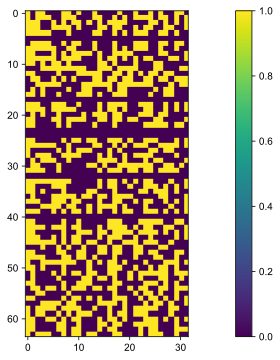

In [56]:
hash_key = [get_lsh_dpe(k, software=True) for k in tqdm(mem_keys)]

# hash_key = []

# for k in tqdm(mem_keys):
#     hash_key.append(get_lsh_dpe(k))


plt.imshow(np.array(hash_key))
plt.colorbar()
plt.grid(False)

Text(0, 0.5, 'Class')

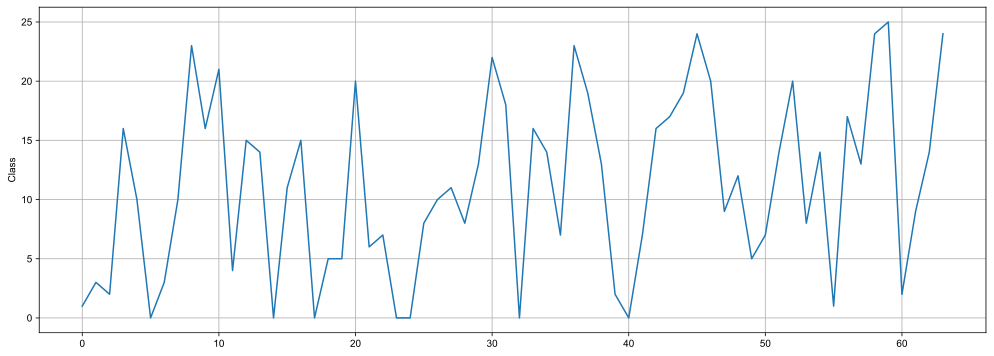

In [57]:
plt.plot(mem_vals)
plt.ylabel('Class')

In [62]:
y_true = []
y_preds= []

for i, (qq, yy) in tqdm(enumerate(zip(qs_new, y_new)), total=len(y_new)):
    if i==0:
        continue
    
    q_hash = get_lsh_dpe(qq, software=True).reshape(-1)
    
    distance  = hamming(q_hash, hash_key)
    y_pred = mem_vals[distance.argmin()]
    
#     similarities = normalized_query @ mem_keys.T
#     y_pred = mem_vals[similarities.argmax()]
    
    y_preds.append(y_pred)
    y_true.append(yy[0])
    
y_true = np.array(y_true)
y_preds= np.array(y_preds)

print(np.mean(y_true==y_preds))


0.7894736842105263


In [63]:
y_true = []
y_preds= []

for i, (qq, yy) in tqdm(enumerate(zip(qs, y)), total=len(y)): 
#     if i<125:
#         continue
    
    q_hash = get_lsh_dpe(qq, software=True).reshape(-1)
    
    distance  = hamming(q_hash, hash_key)
    y_pred = mem_vals[distance.argmin()]
    
#     similarities = normalized_query @ mem_keys.T
#     y_pred = mem_vals[similarities.argmax()]
    
    y_preds.append(y_pred)
    y_true.append(yy[0])
    
y_true = np.array(y_true)
y_preds= np.array(y_preds)

print(np.mean(y_true==y_preds))


0.856


In [64]:
save_workspace(vars(), note='lsh-hardware-g')

Saving In(<class 'list'>), Out(<class 'dict'>), mem_vals(<class 'numpy.ndarray'>), mem_keys(<class 'numpy.ndarray'>), x(<class 'list'>), y(<class 'list'>), x_new(<class 'list'>), y_new(<class 'list'>), qs(<class 'list'>), qs_new(<class 'list'>), hash_planes(<class 'numpy.ndarray'>), hash_key(<class 'list'>), y_true(<class 'numpy.ndarray'>), y_preds(<class 'numpy.ndarray'>), i(<class 'int'>), qq(<class 'numpy.ndarray'>), yy(<class 'numpy.ndarray'>), q_hash(<class 'numpy.ndarray'>), distance(<class 'numpy.ndarray'>), g(<class 'numpy.ndarray'>), vec(<class 'numpy.ndarray'>), vec_pos(<class 'numpy.ndarray'>), vec_neg(<class 'numpy.ndarray'>), scaling(<class 'numpy.float64'>), Ipos(<class 'numpy.ndarray'>), Ineg(<class 'numpy.ndarray'>), Ires(<class 'numpy.ndarray'>), to 20200617-172647-lsh-hardware-g.pkl
Saving In(<class 'list'>), mem_vals(<class 'numpy.ndarray'>), mem_keys(<class 'numpy.ndarray'>), x(<class 'list'>), y(<class 'list'>), x_new(<class 'list'>), y_new(<class 'list'>), qs(<cla

## Linear correction

In [69]:
a = 1

In [70]:
if a is None:
    print('a')